<a href="https://colab.research.google.com/github/RAJESHVELAMALA/Project3/blob/main/ImageClassification_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow_hub
!pip install tensorflow
!pip install keras

In [2]:
#Import Os and Basis Libraries
import cv2
import os
import pandas as pd
import numpy as np
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
#Matplot Images
import matplotlib.image as mpimg
# Tensflor and Keras Layer and Model and Optimize and Loss
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
from keras import Sequential
from keras.layers import *
from tensorflow.keras.losses import BinaryCrossentropy
#Kernel Intilizer
from sklearn.preprocessing import LabelEncoder
# import tensorflow_hub as hub
from tensorflow.keras.optimizers import Adam , Adamax
#PreTrained Model
from tensorflow.keras.applications import *
#Early Stopping
from tensorflow.keras.callbacks import EarlyStopping
# Correct import for ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Warnings Remove
import warnings
import tensorflow_hub as hub
warnings.filterwarnings("ignore")

import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model



# paellet
palette = ["#606060FF", "#D6ED17FF"]

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#from google.colab import files
#files.upload()


In [4]:
#!unzip /content/sample_data/fast-food-classification-dataset/Train/foodclassification.zip -d /content/drive/MyDrive/fast-food-classification-dataset/

In [5]:
# Load Data and Make DataFrame
def L_Data(directory):
    filepath =[]
    label = []

    folds = os.listdir(directory)

    for fold in folds:
        f_path = os.path.join(directory , fold)

        imgs = os.listdir(f_path)

        for img in imgs:

            img_path = os.path.join(f_path , img)
            filepath.append(img_path)
            label.append(fold)

    #Concat data paths with labels
    file_path_series = pd.Series(filepath , name= 'filepath')
    Label_path_series = pd.Series(label , name = 'label')
    df_train = pd.concat([file_path_series ,Label_path_series ] , axis = 1)

    return df_train

# # Directory containing the "Train" folder
directory_T = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train"
# Directory containing the "Train" folder
directory_TE = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Test"
directory_VAL = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Valid"
# Train Data and Test Data
tr_d = L_Data(directory_T)
te_d = L_Data(directory_TE)

In [6]:
# Shape
print(f"The shape of The Train data is: {tr_d.shape}")
print(f"The shape of The Test data is: {te_d.shape}")

The shape of The Train data is: (14993, 2)
The shape of The Test data is: (1500, 2)


In [7]:
#Data_Dir Train And Test
test_dir = directory_TE
data_dir = "/content/drive/MyDrive/fast-food-classification-dataset/train_dataset"

# Image Size
IMAGE_SIZE = (256, 256)

print('Training Images:')
# creating the training dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    directory_T,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

#Testing Augmented Data
print('Validation Images:')
validation_ds = tf.keras.utils.image_dataset_from_directory(
    directory_T,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMAGE_SIZE,
    batch_size=32)

# Create an ImageDataGenerator instance without augmentation
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Load test data using ImageDataGenerator
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=32,
    class_mode='categorical',
    shuffle=False ,
)

Training Images:
Found 14991 files belonging to 10 classes.
Using 11993 files for training.
Validation Images:
Found 14991 files belonging to 10 classes.
Using 2998 files for validation.
Found 1500 images belonging to 10 classes.


In [8]:
# Normalizing Pixel Values
# Train Data
train_ds = train_ds.map(lambda x, y: (x / 255.0, y))
# Val Data
validation_ds = validation_ds.map(lambda x, y: (x / 255.0, y))

In [9]:
# Show COunt Function
def Count_S(df, palette):
    # Count the occurrences of each category in the 'label' column
    count = df['label'].value_counts()

    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(20, 6), facecolor='white')

    # Plot pie chart on the first subplot
    sns.set_palette(palette)
    axs[0].pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
    axs[0].set_title('Distribution of Categories')

    # Plot bar chart on the second subplot
    sns.barplot(x=count.index, y=count.values, ax=axs[1], palette=palette)
    axs[1].set_title('Count of Categories')

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()

# Define your custom palette
custom_palette = palette

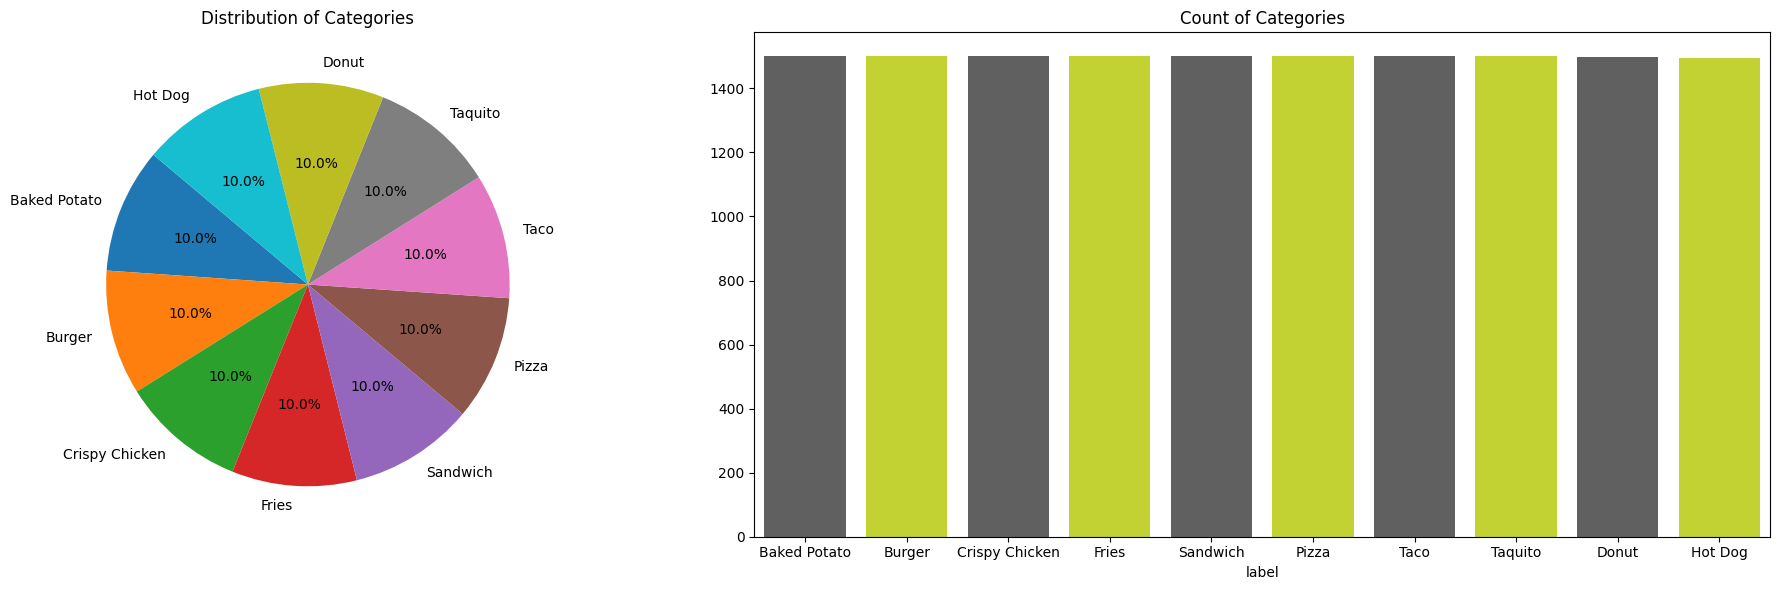

In [10]:
# Train Count
Count_S(tr_d, custom_palette)

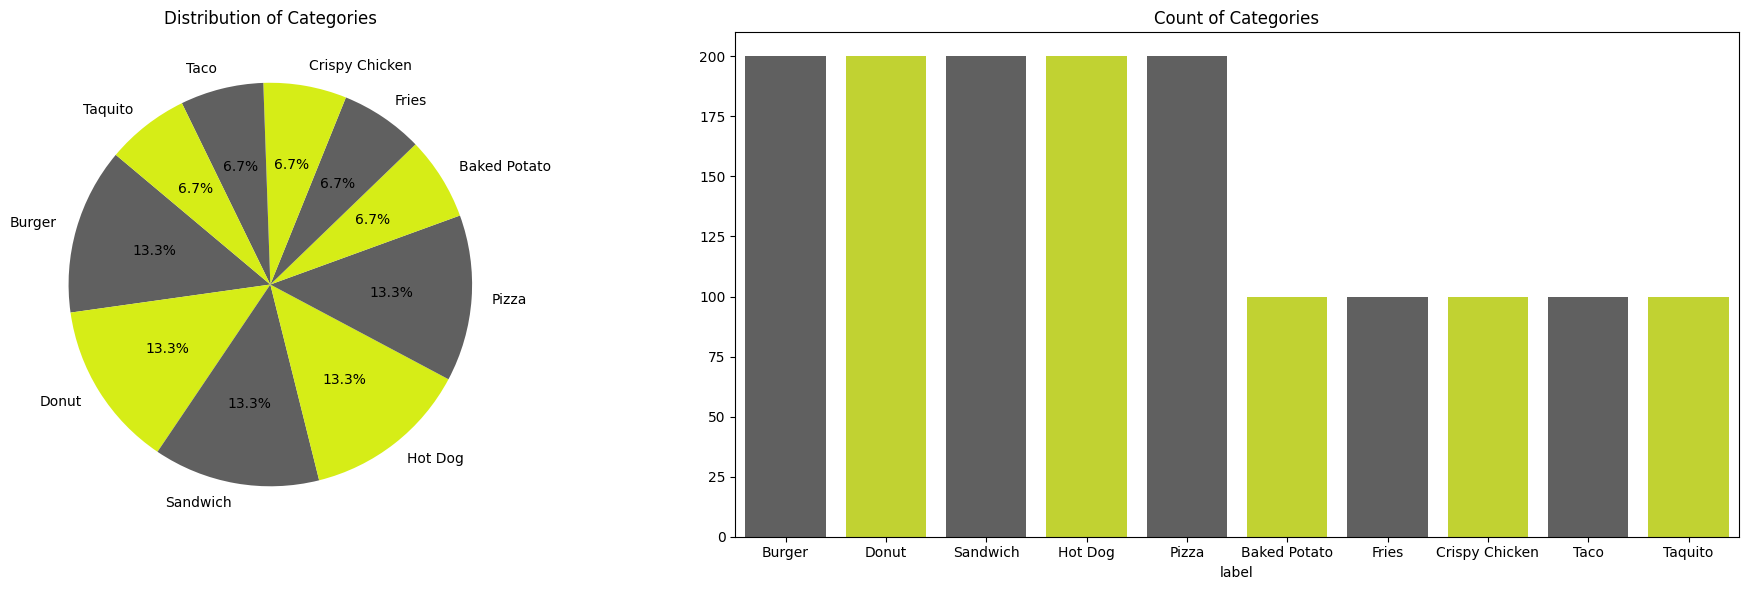

In [11]:
# Test Count
Count_S(te_d, custom_palette)

In [12]:
def visualize_images(path, num_images=5):
    # Get a list of image filenames in the specified path
    image_filenames = os.listdir(path)

    # Limit the number of images to visualize if there are more than num_images
    num_images = min(num_images, len(image_filenames))

    # Create a figure and axis object to display images
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3),facecolor='white')

    # Iterate over the selected images and display them
    for i, image_filename in enumerate(image_filenames[:num_images]):
        # Load the image using Matplotlib
        image_path = os.path.join(path, image_filename)
        image = mpimg.imread(image_path)

        # Display the image
        axes[i].imshow(image)
        axes[i].axis('off')  # Turn off axis
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()

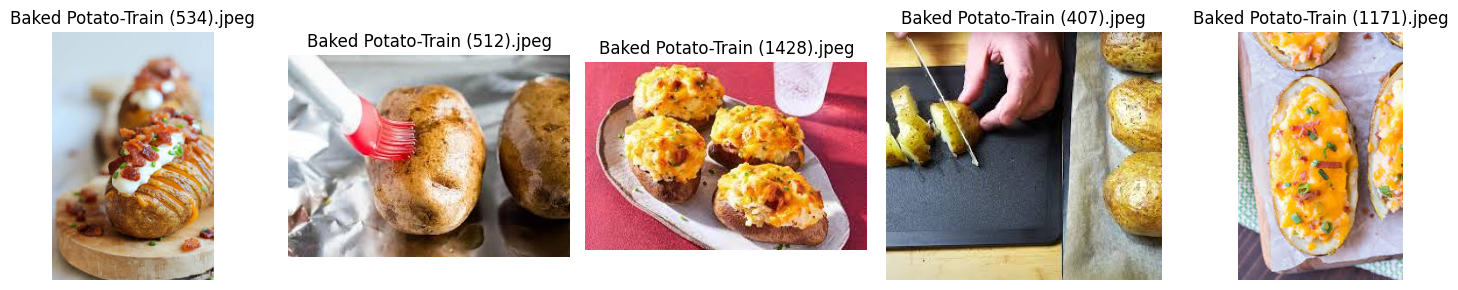

In [13]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Baked Potato"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

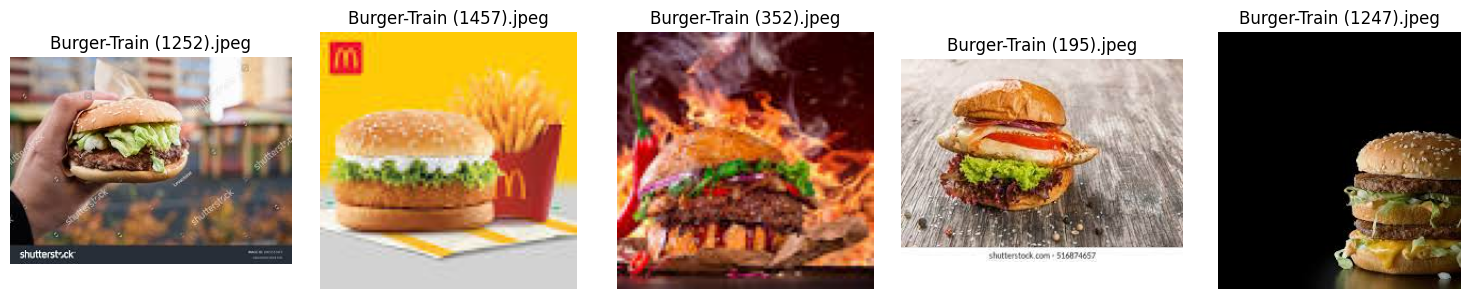

In [14]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Burger"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

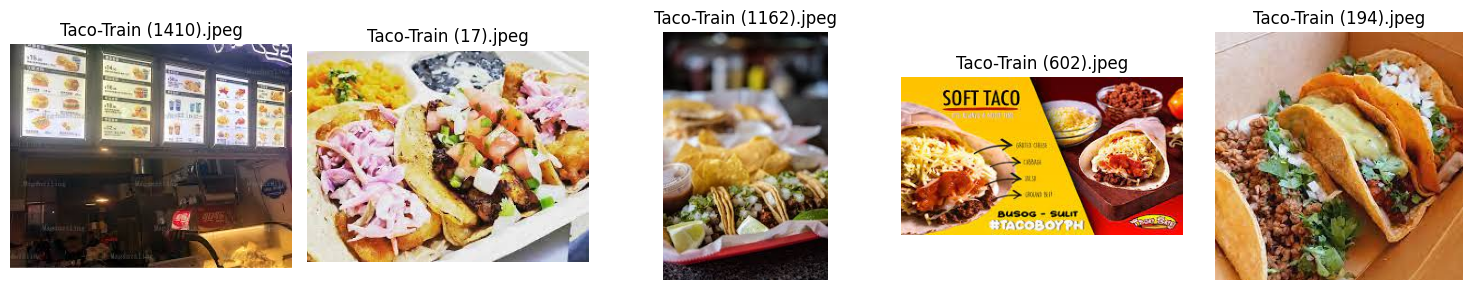

In [15]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Taco"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

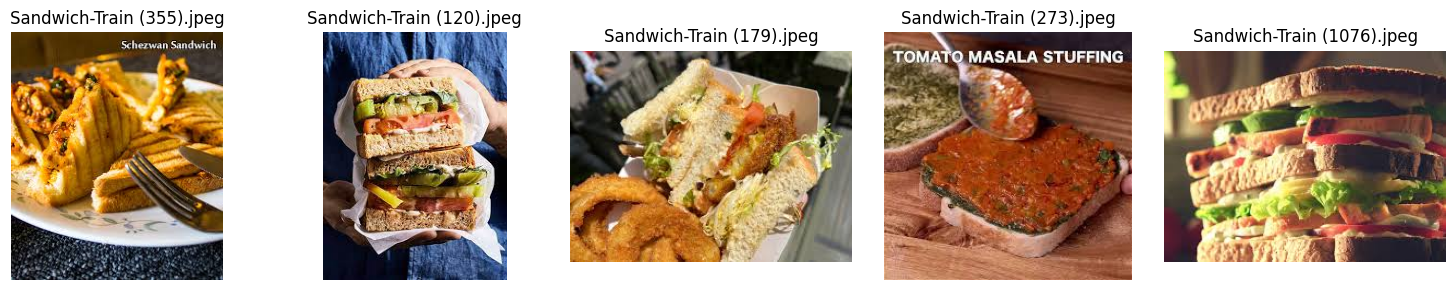

In [16]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Sandwich"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

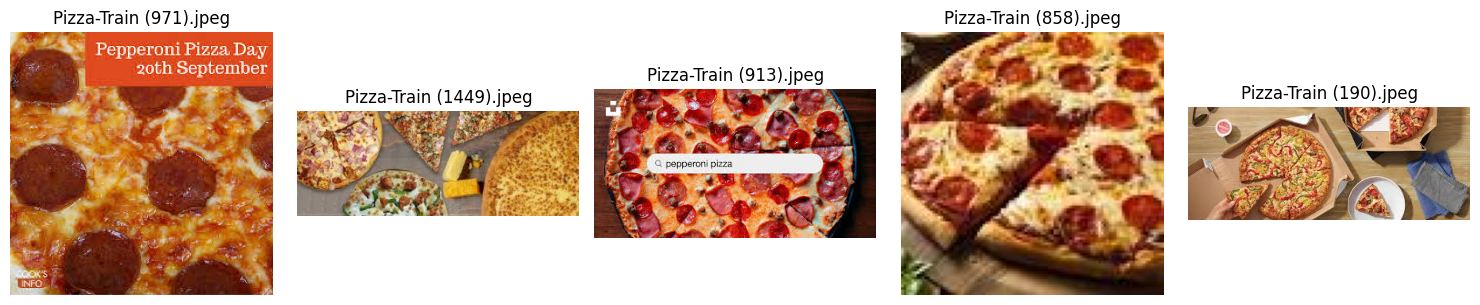

In [17]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Pizza"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

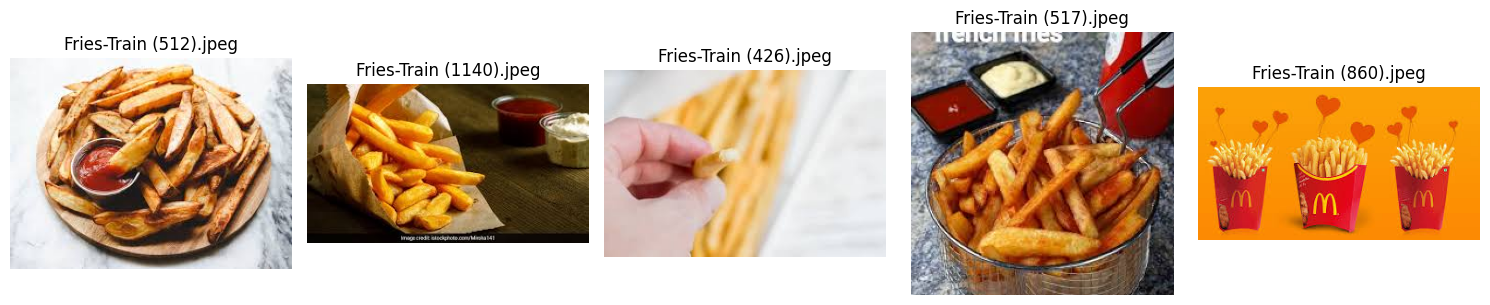

In [18]:
# Specify the path containing the images to visualize
path_to_visualize = "/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Fries"

# Visualize some images from the specified path
visualize_images(path_to_visualize, num_images=5)

In [19]:
# Define the URL of the model
url = "https://tfhub.dev/google/bit/m-r50x1/1"


local_url = "/content/drive/MyDrive/fast-food-classification-dataset/MyModel"

# Load the model from the URL
model_E = hub.KerasLayer(url)

# Set the model to be non-trainable
model_E.trainable = False

In [20]:
import tensorflow_hub as hub

def createModel1(model_E, EPO):
    # Define the name for your model
    model_name = "FoodClassificationModel"

    hub_layer = hub.KerasLayer(model_E, trainable=False)


    # Create a functional model instead of Sequential
    inputs = keras.Input(shape=(256, 256, 3))  # Assuming your input shape

    # Preprocess the input for the TensorFlow Hub model if necessary
    x = tf.keras.applications.resnet50.preprocess_input(inputs)

    x=hub_layer(x)

    # Wrap the TensorFlow Hub model in a Lambda layer to handle symbolic inputs
    x = Lambda(lambda x: model_E(x))(x)  # Pass inputs through the KerasLayer

    # Give the BatchNormalization layer a custom, valid name
    x = BatchNormalization(name='batch_norm_layer')(x)  # Change the layer name here
    x = Dropout(0.2)(x)
    outputs = Dense(10, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name=model_name)

    # Compile
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Print model summary
    print(model.summary())

    # Early_Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    # Fitting Model - Use model.fit() instead of model.fit_generator()
    history = model.fit(train_ds,
                        epochs=EPO,
                        validation_data=validation_ds,
                        callbacks=early_stopping)

    return history,model

#createModel1(model_E, 10)

In [22]:
import tensorflow_hub as hub
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers # Import layers module

def createModel2(model_E ,EPO):
    # Define the name for your model
    model_name = "FoodClassificationModel"
    # Build the model
    # Use the Functional API instead of Sequential to handle the KerasLayer
    inputs = keras.Input(shape=(256, 256, 3))  # Assuming your input shape

    # Wrap the TensorFlow Hub model in a Lambda layer to handle symbolic inputs
    x = Lambda(lambda x: model_E(x))(inputs)  # Pass inputs through the KerasLayer

    # Batch Normalization
    x = BatchNormalization()(x)

    # Dropout
    x = Dropout(0.2)(x)

    # Add the output layer with 10 units and Softmax activation function
    outputs = Dense(10, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs, name=model_name)

    # Compile
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Print model summary
    print(model.summary())

    #Early_Stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

    #Fitting Model - Use model.fit() instead of model.fit_generator()
    history = model.fit(train_ds, # Changed to model.fit()
                            epochs= EPO,
                            validation_data = validation_ds,
                            callbacks = early_stopping)

    return history,model

#createModel2(model_E, 6)

In [23]:
#history = M_B(model_E, 6)
history,model = createModel2(model_E, 6)

The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'resnet/block4/unit03/c/standardized_conv2d/kernel:0' shape=(1, 1, 512, 2048) dtype=float32>
  <tf.Variable 'resnet/block4/unit03/c/group_norm/beta:0' shape=(512,) dtype=float32>
  <tf.Variable 'resnet/block4/unit03/c/group_norm/gamma:0' shape=(512,) dtype=float32>
  <tf.Variable 'resnet/block4/unit03/b/standardized_conv2d/kernel:0' shape=(3, 3, 512, 512) dtype=float32>
  <tf.Variable 'resnet/block4/unit03/b/group_norm/gamma:0' shape=(512,) dtype=float32>
  <tf.Variable 'resnet/block4/unit03/b/group_norm/beta:0' shape=(512,) dtype=float32>
  <tf.Variable 'resnet/block4/unit03/a/group_norm/beta:0' shape=(2048,) dtype=float32>
  <tf.Variable 'resnet/block4/unit03/a/group_norm/gamma:0' shape=(2048,) dtype=float32>
  <tf.Variable 'resnet/block4/unit02/c/standardized_conv2d/kernel:0' shape=(1, 1, 512, 2048) dtype=float32>
  <tf.Variable 'resnet/block4/unit02/c/group

Model: "FoodClassificationModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 lambda_1 (Lambda)           (None, 2048)              0         
                                                                 
 batch_normalization_1 (Bat  (None, 2048)              8192      
 chNormalization)                                                
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                20490     
                                                                 
Total params: 28682 (112.04 KB)
Trainable params: 24586 (96.04 KB)
Non-trainable params: 4096 (16.00 KB)
____

In [24]:
# Evaluate the model on the validation dataset
validation_loss, validation_accuracy = model.evaluate(validation_ds)

# Print the validation loss and accuracy
print("Validation Loss:", validation_loss)
print("Validation Accuracy:", validation_accuracy)

94/94 [==============================] - 133s 1s/step - loss: 0.2939 - accuracy: 0.9199
Validation Loss: 0.29386353492736816
Validation Accuracy: 0.9199466109275818


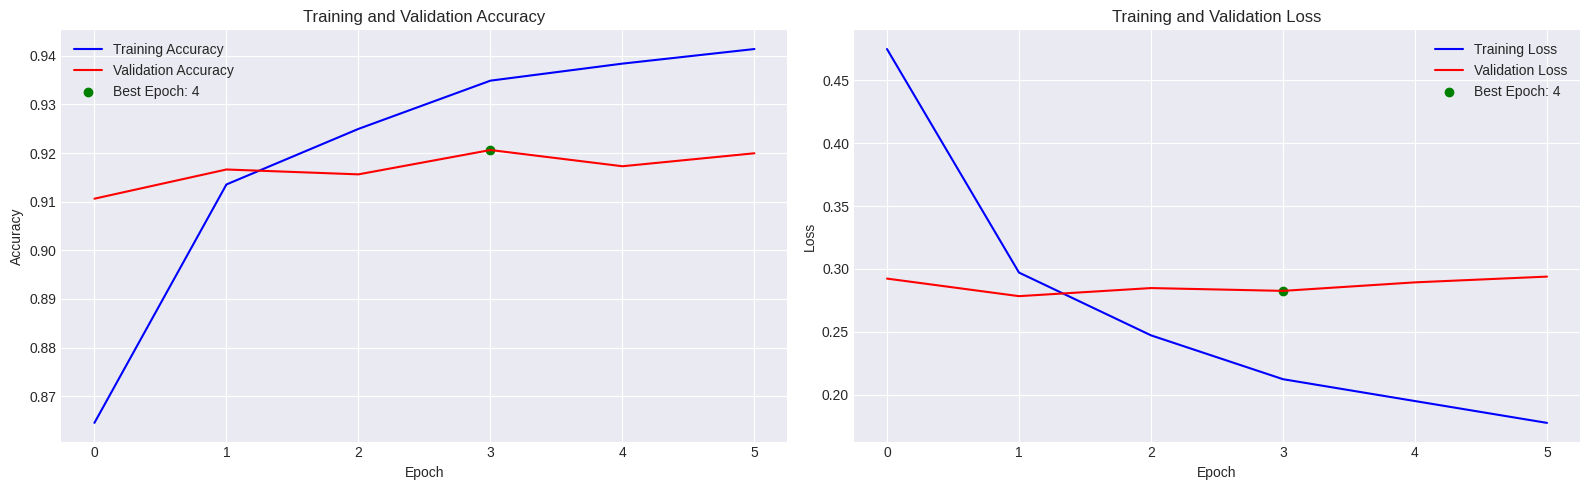

In [25]:
# Get the epoch with the highest validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1

# Set the background style
plt.style.use('seaborn-darkgrid')

# Create a subplot with 1 row and 2 columns
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

# Plot training and validation accuracy
axs[0].plot(history.history['accuracy'], label='Training Accuracy', color='blue')
axs[0].plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
axs[0].scatter(best_epoch - 1, history.history['val_accuracy'][best_epoch - 1], color='green', label=f'Best Epoch: {best_epoch}')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Training and Validation Accuracy')
axs[0].legend()

# Plot training and validation loss
axs[1].plot(history.history['loss'], label='Training Loss', color='blue')
axs[1].plot(history.history['val_loss'], label='Validation Loss', color='red')
axs[1].scatter(best_epoch - 1, history.history['val_loss'][best_epoch - 1], color='green',label=f'Best Epoch: {best_epoch}')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Loss')
axs[1].set_title('Training and Validation Loss')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
class_labels

In [32]:
!pip install gradio
!pip install openai
!pip install langchain openai
!pip install langchain
!pip install langchain-community

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.7/318.7 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.3/10.3 MB 65.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.9/362

In [80]:

class_labels = tr_d['label'].unique().tolist()
#food_model = load_model('/content/drive/MyDrive/fast-food-classification-dataset/MyModel/food_imageprocessing_model')
food_model = model

In [79]:
def getImage(imagePath):

  image = Image.open(imagePath)
  image = image.resize((256, 256))
  image_array = img_to_array(image)
  image_array = np.expand_dims(image_array, axis=0)
  image_array = image_array /  255.0

  return image_array

In [81]:
from PIL import Image
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
import openai
from langchain.chat_models import ChatOpenAI
from PIL import Image
from tensorflow.keras.preprocessing.image import img_to_array


image_path1 ='/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Fries/Fries-Train (1).jpeg'
image_path2 ='/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Donut/Donut (1).jpeg'
image_path3 = '/content/drive/MyDrive/fast-food-classification-dataset/Fast Food Classification V2/Train/Burger/Burger-Train (100).jpeg'

API_KEY = "API_KEY"
OPENAI_MODEL = "gpt-3.5-turbo" # Add the model name you want to use

def chatgpt( image_path, input_text):
  # Load and preprocess the image


  image = Image.open(image_path)
  image = image.resize((256, 256))
  image_array = img_to_array(image)
  image_array = np.expand_dims(image_array, axis=0)
  image_array = image_array /  255.0

  # Load the trained model
  #food_model = load_model('/content/drive/MyDrive/fast-food-classification-dataset/MyModel/food_imageprocessing_model')
  predictions = model.predict(image_array)
  predicted_class = np.argmax(predictions, axis=1)
  print(predicted_class)
  class_labels = tr_d['label'].unique().tolist()
  print(class_labels[predicted_class[0]])


  #food_model = tf.keras.layers.TFSMLayer('/content/drive/MyDrive/fast-food-classification-dataset/MyModel/food_imageprocessing_model',call_endpoint='serving_default')
  # Make a prediction
  #predictions = model(image_array) # Call the model with the image array
  #predicted_class = np.argmax(predictions, axis=0)
  #print(predicted_class)
  #class_labels = tr_d['label'].unique().tolist()
  #print(class_labels[predicted_class])

  print(predicted_class)
  foodItem  = class_labels[predicted_class[0]]

  # Pass the query to the invoke method which will make a prediction based on the query, and print the result.
  llm = ChatOpenAI(openai_api_key=API_KEY, model_name=OPENAI_MODEL, temperature=0.3) # Now ChatOpenAI is defined
  result = llm.invoke(foodItem+" "+ input_text)
  # Return the generated text
  return 'Food Item : ' + foodItem + ' \n '+ result.content


returnMessage = chatgpt(image_path3,'Nutrition')

print(returnMessage)

1/1 [==============================] - 0s 152ms/step
[1]
Burger
[1]
Food Item : Burger 
 Burgers can vary greatly in terms of nutrition depending on the ingredients used and how they are prepared. Here is a general breakdown of the nutrition information for a typical burger:

- A basic hamburger patty (4 oz) made from lean ground beef contains approximately 250 calories, 20g of protein, 18g of fat, and 0g of carbohydrates.

- A cheeseburger with a slice of cheese added to the basic patty will have slightly higher calories and fat content, typically around 300 calories, 25g of protein, 22g of fat, and 1-2g of carbohydrates.

- Adding toppings such as lettuce, tomato, onions, pickles, and condiments like ketchup or mustard will add minimal calories and fat, but can increase the overall nutritional value of the burger by adding fiber, vitamins, and minerals.

- Opting for a whole wheat or multigrain bun instead of a white bun can provide additional fiber and nutrients, but will also add s

In [78]:
import gradio as gr

# ... (your existing chatgpt and display_image functions) ...

# Create the Gradio app using gr.Blocks
with gr.Blocks() as demo:
    gr.HTML("<CENTER><h1>AI NutriSnap</h1></CENTER>")
    #gr.Markdown("## AI NutriSnap")  # Add a title

    with gr.Row():  # Arrange components in a row

        with gr.Column():
            # Inputs for chatgpt
            file_input = gr.File(label="Upload the picture of food you want to know about:")
            text_input = gr.Textbox(label="Enter your message")
            # Define the chatgpt function call
            chatgpt_button = gr.Button("Submit")


        with gr.Column():
            # Input and output for displayImage
            image_input = gr.Image(type="pil", label="Uploaded Image")
            # Display the uploaded image
            #chatgpt_output = gr.Textbox(label="Here are some details about it")
            chatgpt_output = gr.Text(label="Here are some details about it")
            file_input.change(fn=display_image, inputs=file_input, outputs=image_input)

        chatgpt_button.click(fn=chatgpt, inputs=[file_input, text_input], outputs=chatgpt_output)

# Launch the combined interface
demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://871e02f527b8a9d364.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
